In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"

In [2]:
cd = "C://Users//scottjmk//Dropbox//Research//petra_moser//"

df1 = pd.read_csv(cd+"Replication//Data//MoS1956/MoS1956_Final.csv")

df1 = df1[["unique_id", "firstname", "middlename", "lastname", "birthyear", "gender", "yearofmarriage", "child", "cluster", "female", "womens_college", "see"]]

df2 = df1[df1["womens_college"]==1][~df1["birthyear"].isnull()]

female_index = df2[~df2["female"].isnull()].index.tolist()
df2["female"] = 0
for x in female_index:
    df2.loc[x, "female"] = 1
    
female_index = df2[df2["gender"]=="female"].index.tolist()
df2["gender"] = 0
for x in female_index:
    df2.loc[x, "gender"] = 1
    
manual = df2.groupby("birthyear", as_index = False)["female"].mean()
ssa = df2.groupby("birthyear", as_index = False)["gender"].mean()

df = pd.merge(manual, ssa, on = "birthyear", how = "outer")

df = df[df["birthyear"]>=1870]

columns = ["female", "gender"]
for x in columns:
    df[x] = df[x].rolling(center=True, window=3).mean()
    
for x in columns:
    df[x] = 100*df[x]
    
df

C:\Users\scottjmk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,9,16,17,18,19,27,28,34,52,53,56,57,60,61,65,68,69,108,109,112,113,116,117,120,121,124,125,128,129,172,176,177,180,181,184,185,189,193,197,201,205,209,213,217,221,225,229,233,237,241,356,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,441,445,449,453,457,461,465,469,472,473,477,480,481,484,485,488,489,492,493,534,535,536,537,538,539,575,576,579,580,583,584,587,588,644,648,651,652,655,656,659,660,663,667,671,675,679,727,728,731,732,735,736,739,740,743,744,747,748,751,752,755,756,759,760,763,764,767,768,771,772,775,776,779,780,783,784,787,788,791,792,795,799,800,803,804,807,808,811,819,820,821,822,823,824,825,826,827,828,843,844,845,846,847,865,898,899,900,901,912,913,914,915,916,917,928,929,930,931,932,933,934,936,937,938,939,940,941,942,943,944,969,970,971,972,973,974,

,birthyear,female,gender
3,1870.0,NaN,NaN
4,1871.0,27.777778,100.000000
5,1872.0,47.777778,100.000000
6,1874.0,31.111111,100.000000
7,1875.0,53.333333,88.888889
8,1877.0,33.333333,88.888889
9,1878.0,50.000000,88.888889
10,1879.0,33.333333,91.666667
11,1880.0,44.444444,91.666667
12,1881.0,55.555556,86.111111


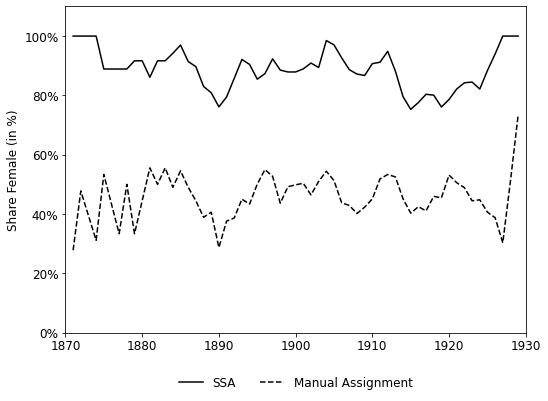

In [3]:
fig, ax1 = plt.subplots(figsize = (8.25, 6))

df.set_index("birthyear")["gender"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "SSA")
df.set_index("birthyear")["female"].plot(ax = ax1, color = "black", linewidth = 1.5, label = "Manual Assignment", linestyle = "--")

ax1.set_xlim(1870, 1930)
ax1.set_ylim(0, 110)
ax1.set_ylabel("Share Female (in %)", fontsize = 12)
ax1.set_xlabel("", fontsize = 12)

plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12, rotation = 0)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0.1))

ax1.legend(loc = "upper center", bbox_to_anchor = (0.50, -0.1), ncol = 2, frameon = False, fontsize = 12)

plt.savefig(cd+"Replication//Output//Figures/FigureA1.jpg", transparent=False, bbox_inches="tight")